# Исследование закономерностей, определяющих успешность игры/ платформы

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования** - проверить несколько гипотез:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Были получены данные из файла '/datasets/games.csv' о продажах игр в интернет - магазине «Стримчик», оценки пользователей и экспертов, жанры и платформы. Перед проверкой гипотез понадобится обзор данных так как качество их нам не известно. Ход исследования будет следующим:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Проверка гипотез.



### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**1.1 Основная информация о датафрейме.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.2 Посмотрим первый строки датафрейма**

In [4]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<font color='green'>**Вывод:**</font>

При изучение данных мы увидили, что имеем 16715 строк и 11 столбцов. Названия столбцов лучше привести к нижнему регистру. В столбцах Year_of_Release, Genre, Name, Critic_Score, User_Score, Rating присутствуют пропуски. Так же видим, что некоторые столбцы нужно преобразовать в другой тип данных.


### Предобработка данных

**2.1. Замена названия столбцов (привести к нижнему регистру)**

In [5]:
# посмотрим названия столбцов датафрейма
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# приведем название столбцов к нижнему регистру
data = data.rename(columns=str.lower)

In [7]:
# посмотрим результат
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2 Обработка пропусков и преобразование данных в нужный тип**

In [8]:
# посчитаем долю пропусков в % 
data.isna().mean().sort_values()*100

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

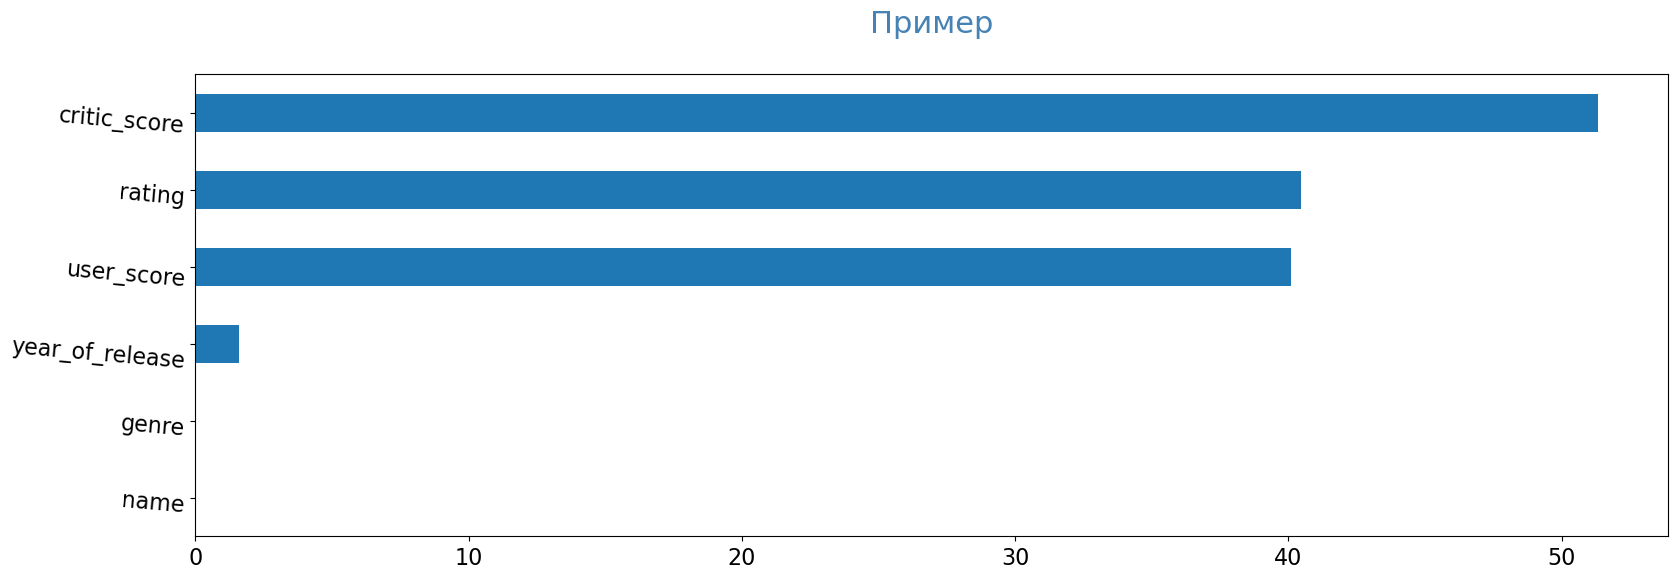

In [10]:
pass_value_barh(data)

In [11]:
# посмотрим на пропуски в столбце 'genre'
data[data['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# посмотрим на пропуски в столбце 'name'
# 2 пропуска в name совпадают с 2 пропусками в genre
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# посмотрим на пропуски в столбце 'year_of_release'
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# удалим пропущенные значения в year_of_release, name, genre так как их очень малое количество
data = data.dropna(subset= ['year_of_release', 'name', 'genre'])

In [15]:
# посмотрим удаление пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
# переведем значения year_of_release из типа float в int
data['year_of_release'] = data['year_of_release'].astype(int)

In [17]:
# мы видим что в оценке пользователей очень часто встречается непонятная аббревиатура 'tbd'
# скорее всего она означает, что игра еще не оценена достаточным количеством образом
# заменим ее на NaN
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [18]:
# заменяем 'tbd' на пропущенные значения(NaN) и переводим столбец из типа object в тип float 
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

In [19]:
# заменим пропуски в столбце ratihg на рейтинг отсутствует('zero_rating')
data['rating'] = data['rating'].fillna('zero_rating')
data['rating']

0                  E
1        zero_rating
2                  E
3                  E
4        zero_rating
            ...     
16710    zero_rating
16711    zero_rating
16712    zero_rating
16713    zero_rating
16714    zero_rating
Name: rating, Length: 16444, dtype: object

<font color='green'>**Вывод:**</font>

Заменили тип данных в столбце 'year_of_release' из типа float на int, год выпуска не может быть дробным значением и в столбце
'user_score' из типа object в тип float, в столбце находились перемешанные данные с типом int. 

В столбце year_of_release, genre, name,  пропущенных значений малое количество, они не повлияют на наши результаты, удалим их.
В столбцах с рейтингами 'critic_score' и 'user_score' пропуски заполнять не стоит, так как мы не имеем дополнительных данных по их отсутствию, а так же после их заполнения или удаления можно получить неточные результаты при дальнейшем анализе.
В столбце 'rating' заменили все пропуски на 'zero_rating'.

Пропуски лучше заполнять реальными данными, попытаться найти информацию в различных источниках, сайтах или попросить помочь программистов восстановить данные, если это возможно и вообще не нужно стремиться заполнить абсолютно все пропуски. Иногда проще и безопаснее их проигнорировать.

Причины, которые могли привести к пропускам в исходных данных: человеческий фактор (например при внесении данных, могли случайно нажать пробел, скопировать лишние символы, удалить значения ячеек).
Также могут быть технические причины появления пропусков (например, неудачно написанный код, по которому происходила загрузка данных с сервера).

Возможна такая ситуация, что пользователь не указал о себе какие-нибудь сведения или система сбора данных дала сбой. Особенно пользователи любят не заполнять все данные о себе.

**2.3 Обработка явных дубликатов**

In [20]:
# смотрим на наличие явных дубликатов
data.duplicated().sum()

0

**2.4. Обработка и удаление аномалий**

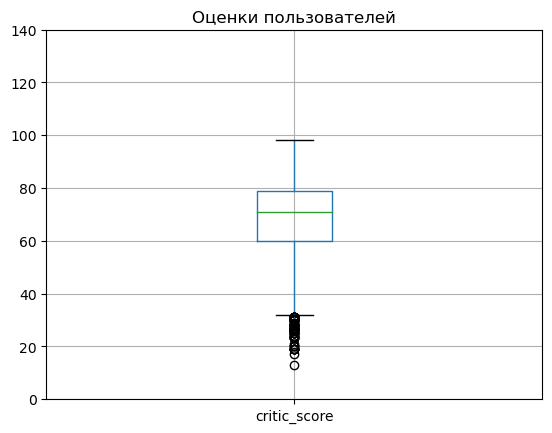

In [21]:
# посмотрим аномальные значения 'critic_score', по условию максимум 100
# построим ящик с усами
data.boxplot('critic_score')
plt.title('Оценки пользователей')
plt.ylim(0, 140);

In [22]:
# посмотрим уникальные значения
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

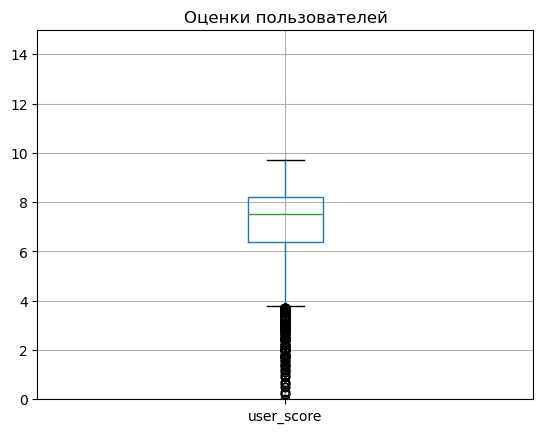

In [23]:
# посмотрим аномальные значения 'user_score', по условию максимум 10
# построим ящик с усами
data.boxplot('user_score')
plt.title('Оценки пользователей')
plt.ylim(0, 15);

In [24]:
# посмотрим уникальные значения
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<font color='green'>**Вывод:**</font>

Явных дубликатов и аномалий не выявлено, значения находятся в допустимых по условияю проекта пределах

**2.5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [25]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,zero_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,zero_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,zero_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,zero_rating,0.01


In [26]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Проведите исследовательский анализ данных

**3.1 Посмотрим, сколько игр выпускалось в разные годы**

In [27]:
# построим для этого сводную таблицу
pivot_year_of_release = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
pivot_year_of_release.columns = ['Кол-во игр']
pivot_year_of_release

,Кол-во игр
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


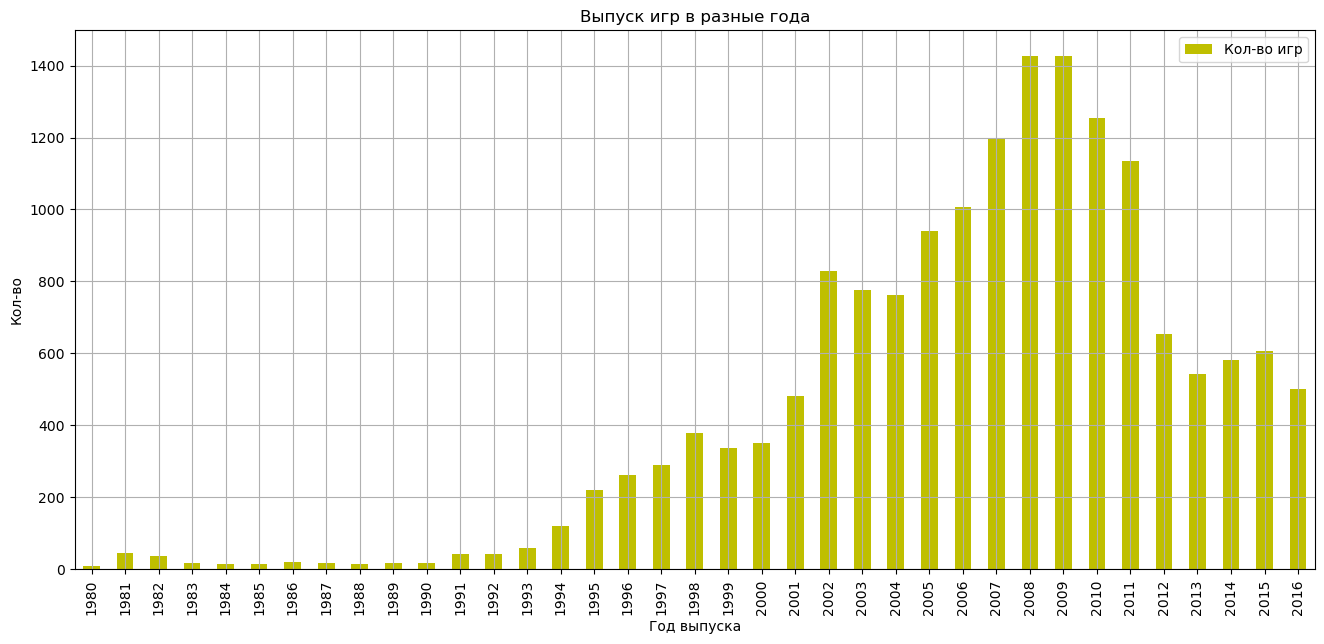

In [28]:
# построим столбчатую диаграмму 
pivot_year_of_release.plot(title = 'Выпуск игр в разные года', kind = 'bar', grid=True, figsize = (16,7), color = 'y')
plt.ylabel('Кол-во')
plt.xlabel('Год выпуска');

<font color='green'>**Вывод:**</font>

Глядя на полученные данные можно сделать вывод, что данные за все периоды неважны, так как выпуск игр в разные годы был не постоянным.
Период с 1980 - 1993 был крайне низким и игр выпускалось очень малое количество.
Начиная с 1994 года произошел подъем игровой индустрии вплоть до 2009 года включительно, с каждым годом игр выпускалось все больше и больше.
В период с 2012 - 2016 произошел спад, скорее всего в эти годы игровую индустрию задел финансовый кризис в мире.

**3.2 Посмотрим, как менялись продажи по платформам**

In [29]:
# построим столбчатую диаграмму  и отсортируем по убыванию суммарных продаж
pivot_platform = data.pivot_table(index = ['platform'], values = 'sum_sales' , aggfunc = 'sum') \
                                    .sort_values('sum_sales', ascending = False)
pivot_platform.columns = ['Суммарные продажи']
pivot_platform

,Суммарные продажи
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


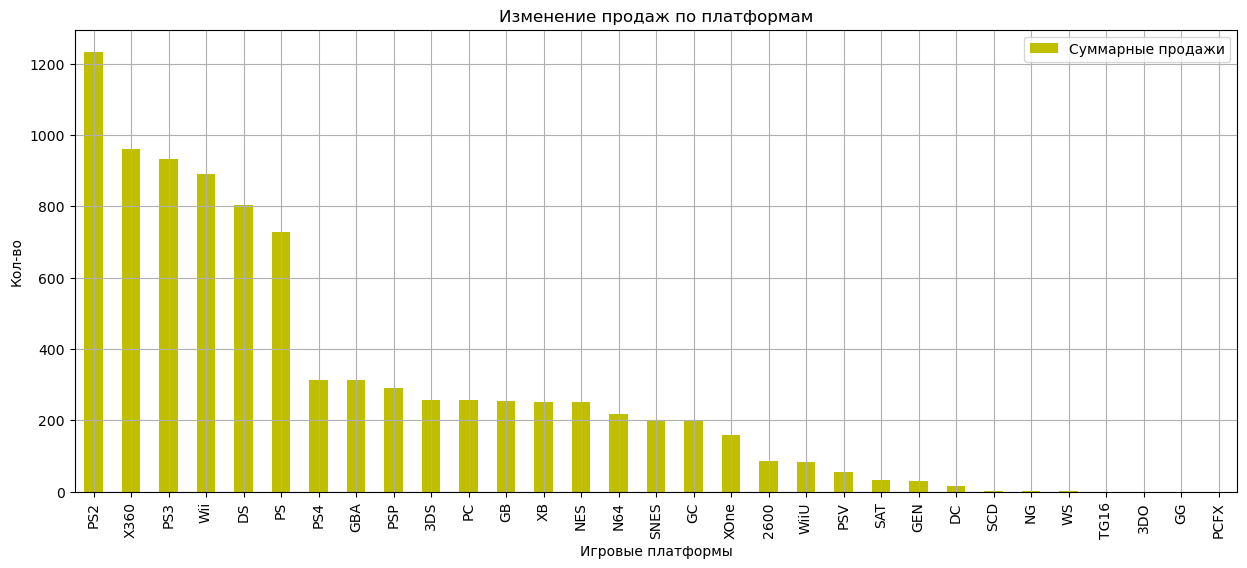

In [30]:
# построим столбчатую диаграмму 
pivot_platform.plot(title = 'Изменение продаж по платформам', kind = 'bar', grid = True, figsize = (15,6), color = 'y')
plt.ylabel('Кол-во')
plt.xlabel('Игровые платформы');

<font color='green'>**Вывод:**</font>

По диаграмме видно, что наибольшие суммарные продажи имеют платформы: PS2, X360, PS3, Wii, DS, PS.

In [31]:
top_ten_platform = list(pivot_platform.index[:10])
top_ten_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [32]:
data[(data['platform']== 'DS')&(data['year_of_release']<= 2003)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,zero_rating,0.02


In [33]:
# удаляем выброс по индексу
data = data.drop(15957)

In [34]:
# проверяем
data[(data['platform']== 'DS')&(data['year_of_release']<= 2003)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


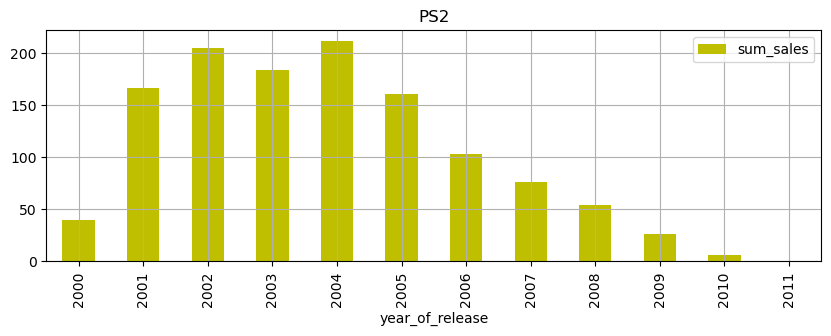

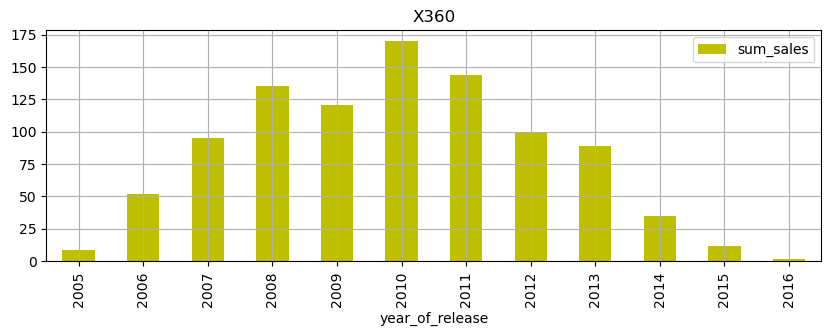

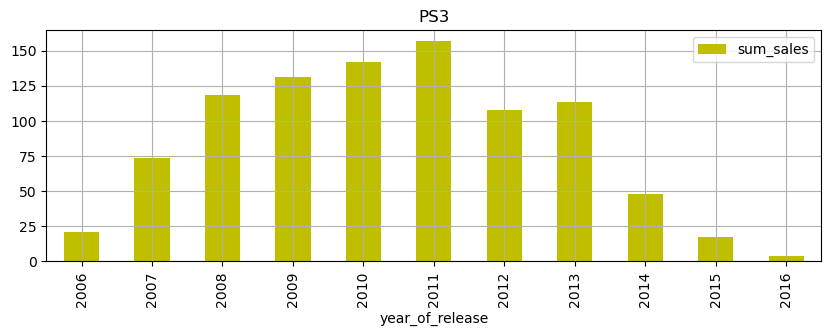

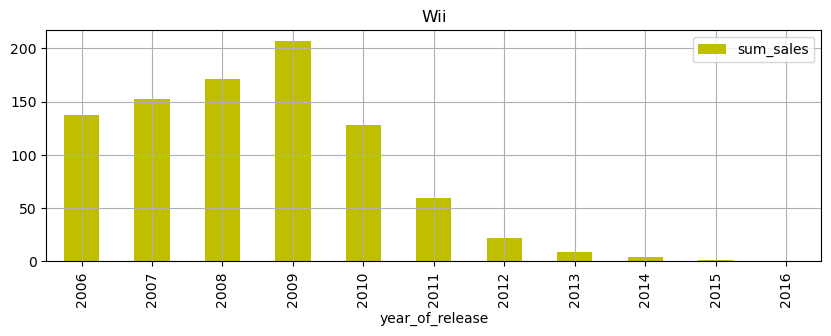

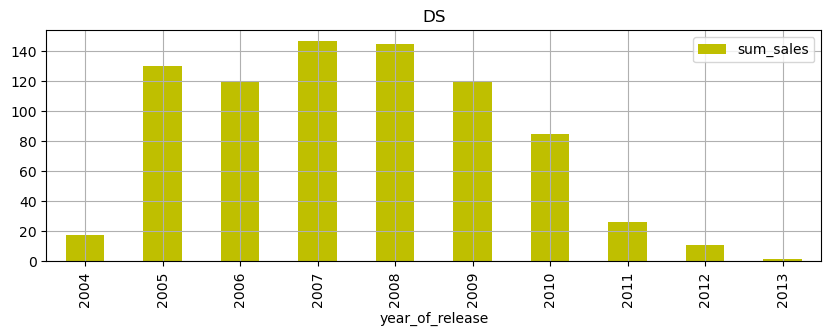

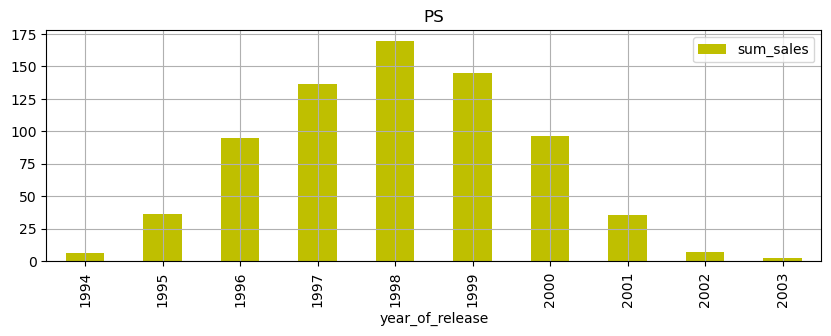

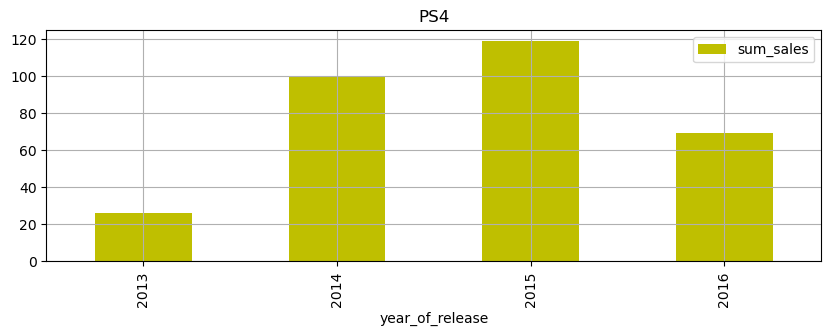

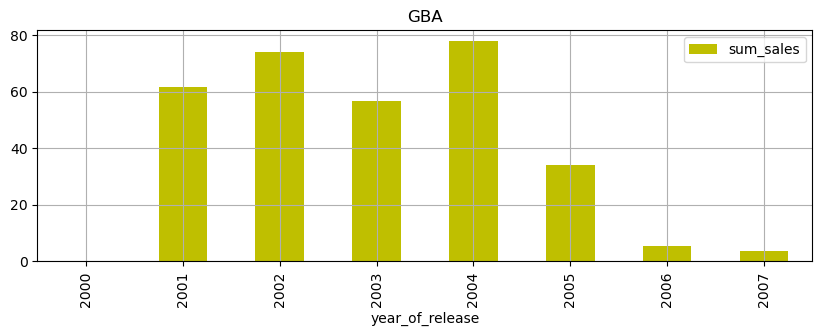

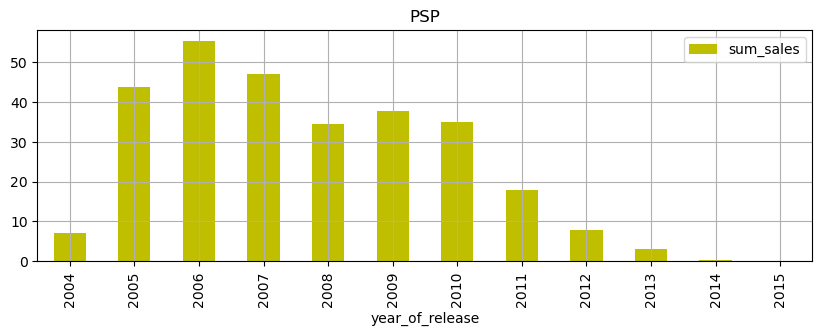

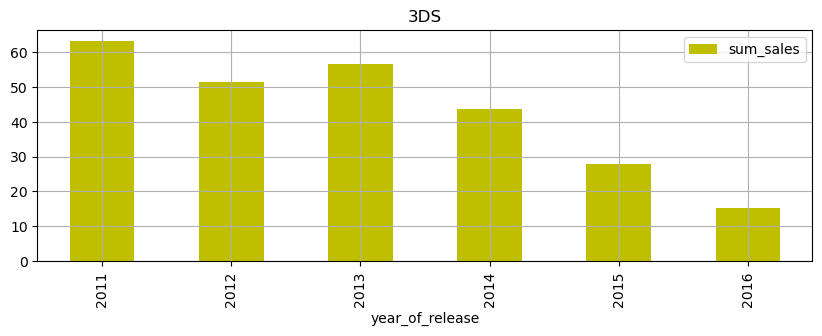

In [35]:
# напишем цикл и построим графики продаж по годам для топ-10 платформ
for console in top_ten_platform:
    data[data['platform'] == console].pivot_table(index = ['year_of_release'], values = 'sum_sales', aggfunc = 'sum') \
                    .plot(title = console, kind = 'bar', grid = True, figsize = (10,3), color = 'y')

In [36]:
# создадим новый датасет с топ-10 платформ
new_top_ten_platform = data.query('platform in @top_ten_platform')
new_top_ten_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,zero_rating,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,zero_rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,zero_rating,0.01


In [37]:
# cколько лет "живет" Топ 10 платформ
new_top_years = new_top_ten_platform.groupby(['platform', 'year_of_release']).agg({'sum_sales':'sum'}).reset_index()
new_top_years['platform'].value_counts()

PS2     12
PSP     12
X360    12
PS3     11
Wii     11
DS      10
PS      10
GBA      8
3DS      6
PS4      4
Name: platform, dtype: int64

<font color='green'>**Вывод:**</font>

В среднем продолжительность жизни платформ 11 лет. Старые платформы исчезают на протяжении 2-3х лет. Думаю стоит взять актуальный период 3 года,  потому что технологии развиваются быстро и игры будут выпускаться чаще.
Для построения прогноза на 2017 год, будем использовать данные с 2014 - 2016 года.

In [38]:
# сделаем срез по актуальному периоду
actual_period = data.query('year_of_release > 2013')
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,zero_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,zero_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,zero_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,zero_rating,0.01


**3.3 Потенциально прибыльные платформы**

In [39]:
# посмотрим суммарные продажи по каждой платформы
profitable_platform = actual_period.pivot_table(index=['platform'], values = 'sum_sales', aggfunc = 'sum').sort_values('sum_sales' , ascending = False)
profitable_platform.columns = ['Суммарные продажи']
profitable_platform

,Суммарные продажи
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [40]:
# посмотрим суммарные продажи по годам платформ
actual_period_pivot = actual_period.pivot_table(index = ['platform', 'year_of_release'], values = 'sum_sales' , aggfunc = 'sum')
actual_period_pivot.columns = ['Суммарные продажи']
actual_period_pivot

Суммарные продажи
platform year_of_release                   
3DS      2014                         43.76
         2015                         27.78
         2016                         15.14
PC       2014                         13.28
         2015                          8.52
         2016                          5.25
PS3      2014                         47.76
         2015                         16.82
         2016                          3.60
PS4      2014                        100.00
         2015                        118.90
         2016                         69.25
PSP      2014                          0.24
         2015                          0.12
PSV      2014                         11.90
         2015                          6.25
         2016                          4.25
Wii      2014                          3.75
         2015                          1.14
         2016                          0.18
WiiU     2014                         22.03
         2015                         16.35
         2016                          4.60
X360     2014                         34.74
         2015                         11.96
         2016                          1.52
XOne     2014                         54.07
         2015                         60.14
         2016                         26.15

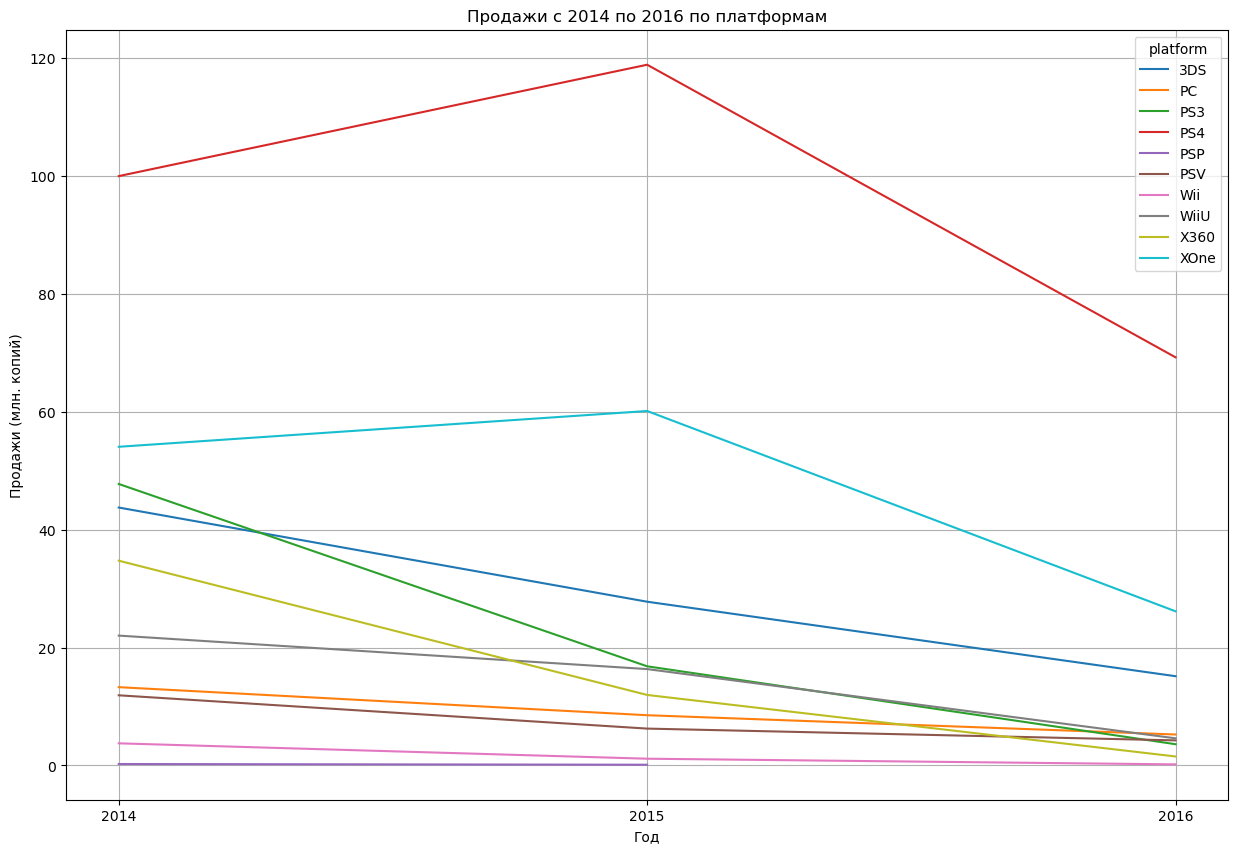

In [41]:
# построим графики динамики продаж платформ за актуальный период
pd.pivot_table(actual_period, index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum') \
                                  .plot(figsize=(15,10))
plt.xticks(np.arange(2014., 2017.))
plt.grid(True)
plt.title('Продажи с 2014 по 2016 по платформам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.show()

<font color='green'>**Вывод:**</font>


На графике видно, что все платформы теряют в продажах, 2016 год по условию неполный, ориентироваться на него не будем.

Улучшить показатели продаж имеют шанс платформы PS4, XOne, WiiU, PC.

Наилучшие перспективы у платформ PS4 и XOne.


In [42]:
# список топ-5 перспективных платформ
top_five_platform = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']

# топ-5 перспективных платформ по продажам
top_5_platform = actual_period.query('platform in @top_five_platform').groupby('platform')['sum_sales'] \
                   .sum().sort_values(ascending=False).reset_index()
top_5_platform

,platform,sum_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,WiiU,42.98
4,PSV,22.40


**3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


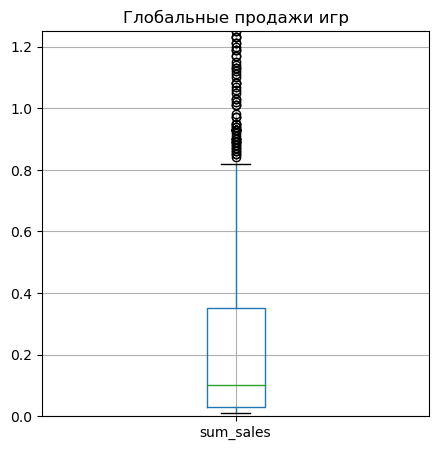

In [43]:
actual_period.boxplot('sum_sales', figsize=(5,5))
plt.title('Глобальные продажи игр')
plt.ylim(0,1.25)
actual_period.describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: sum_sales, dtype: float64

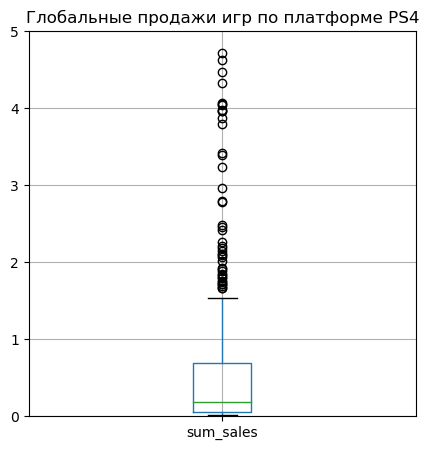

In [44]:
ps4 = actual_period.query("platform == 'PS4'")
ps4.boxplot('sum_sales', figsize=(5,5))
plt.title('Глобальные продажи игр по платформе PS4')
plt.ylim(0,5)
ps4['sum_sales'].describe()

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: sum_sales, dtype: float64

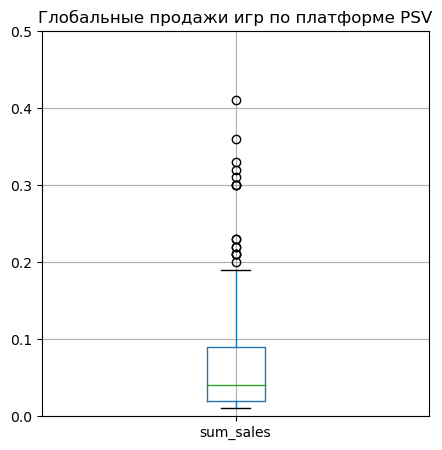

In [45]:
ps3 = actual_period.query("platform == 'PSV'")
ps3.boxplot('sum_sales', figsize=(5,5))
plt.title('Глобальные продажи игр по платформе PSV')
plt.ylim(0,0.5)
ps3['sum_sales'].describe()

count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: sum_sales, dtype: float64

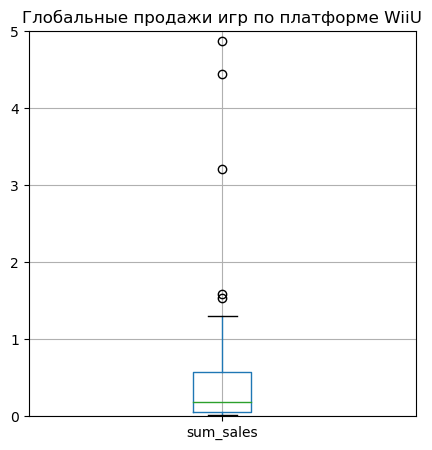

In [46]:
X360 = actual_period.query('platform == "WiiU"')
X360.boxplot('sum_sales', figsize=(5,5))
plt.title('Глобальные продажи игр по платформе WiiU')
plt.ylim(0,5)
X360['sum_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: sum_sales, dtype: float64

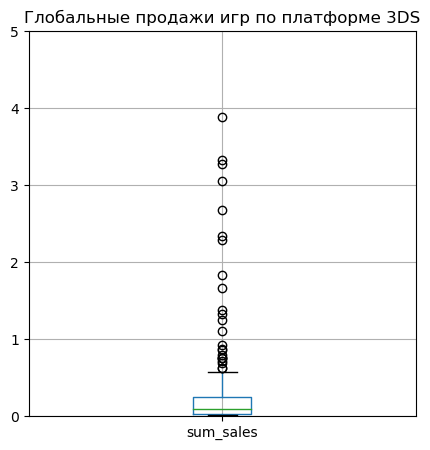

In [47]:
_3ds = actual_period.query("platform == '3DS'")
_3ds.boxplot('sum_sales', figsize=(5,5))
plt.title('Глобальные продажи игр по платформе 3DS')
plt.ylim(0,5)
_3ds['sum_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: sum_sales, dtype: float64

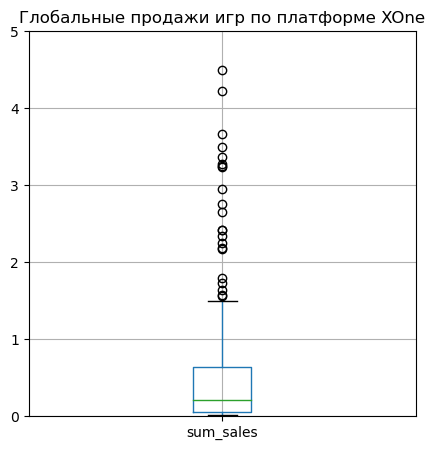

In [48]:
xone = actual_period.query("platform == 'XOne'")
xone.boxplot('sum_sales', figsize=(5,5))
plt.title('Глобальные продажи игр по платформе XOne')
plt.ylim(0,5)
xone['sum_sales'].describe()

In [49]:
actual_period_top5 = actual_period.query('platform in @top_five_platform')

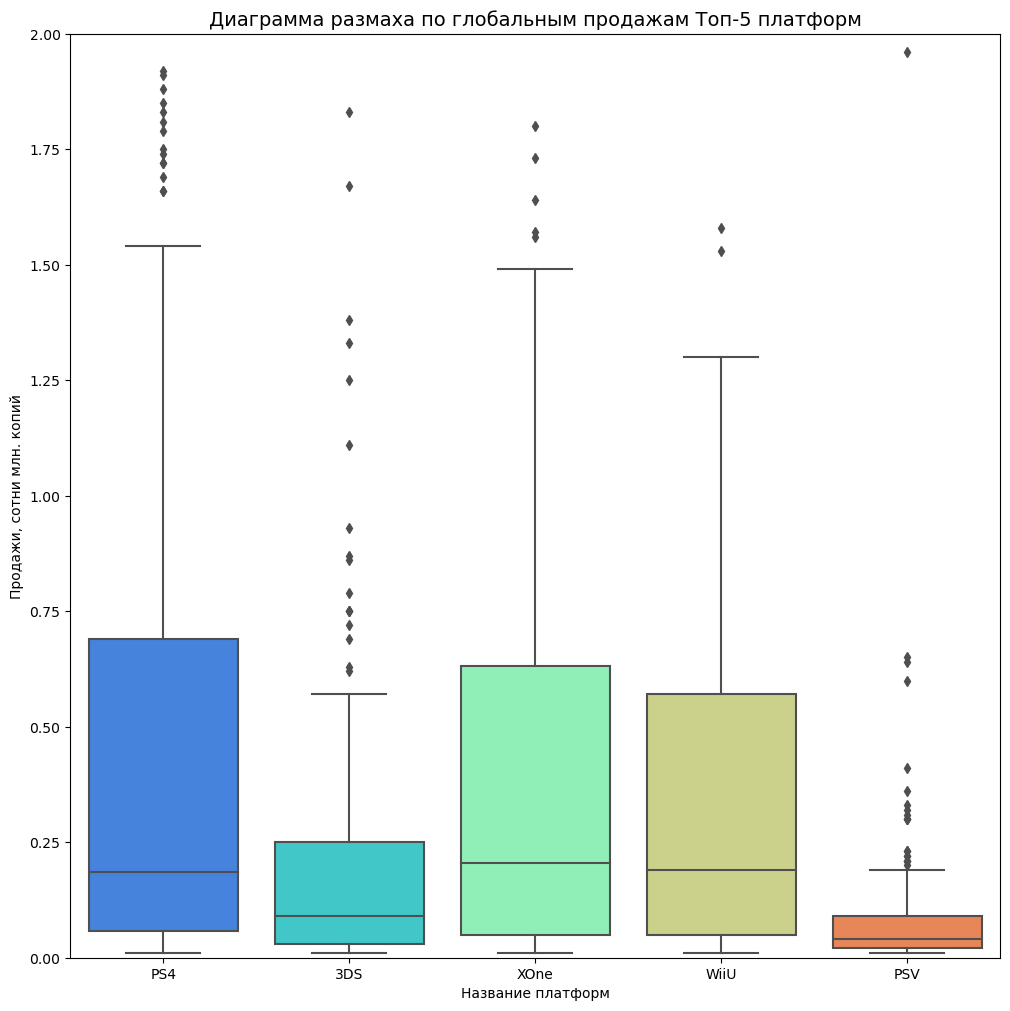

In [50]:
# глобальные продажам за актуальный период по каждой перспективной платформы
plt.figure(figsize=(12, 12))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="sum_sales", data = actual_period_top5 , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам Топ-5 платформ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформ');

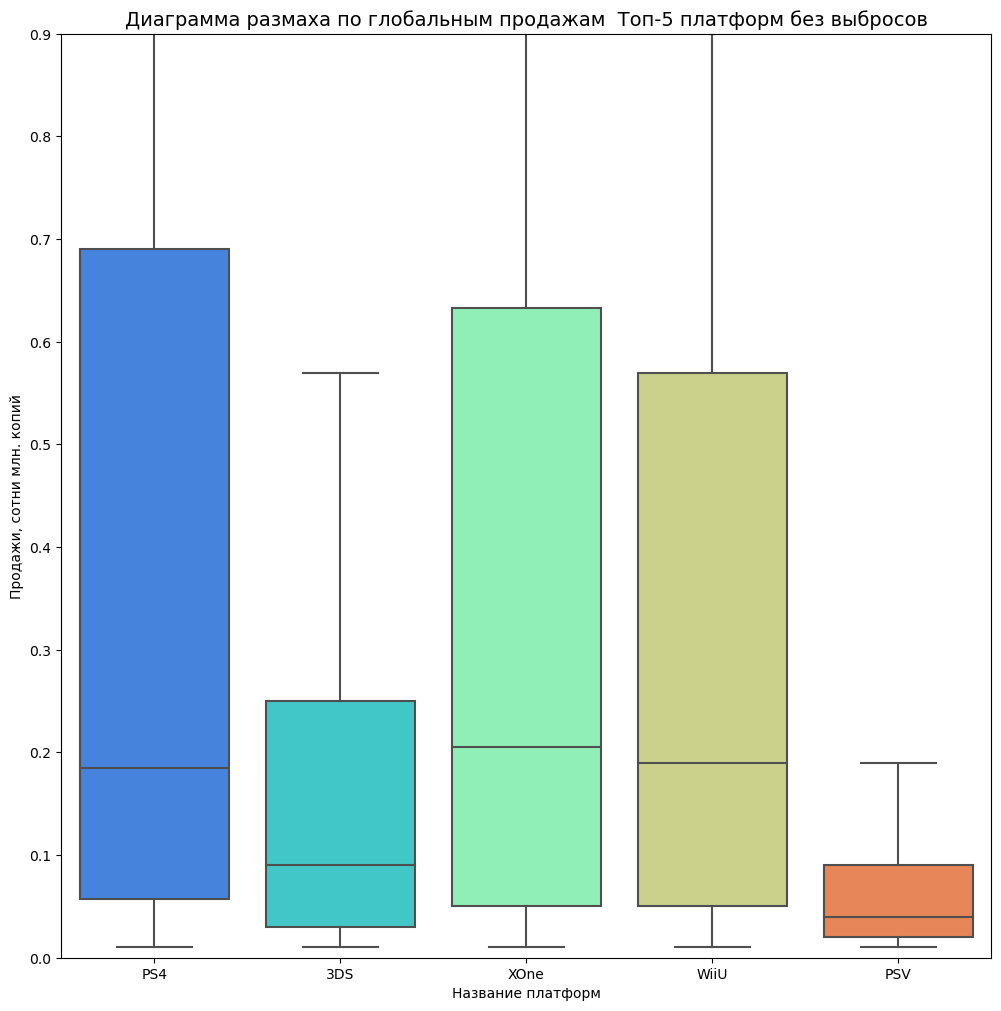

In [51]:
# глобальные продажам за актуальный период по каждой перспективной платформы
plt.figure(figsize=(12, 12))
plt.ylim(0, 0.9)
sns.boxplot(x="platform", y="sum_sales", data = actual_period_top5 , palette='rainbow', showfliers=False)
plt.title('Диаграмма размаха по глобальным продажам  Топ-5 платформ без выбросов', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформ');

<font color='green'>**Вывод:**</font>

Из построенных графиков мы можем сказать следующее:
1. На платформе PS4 суммарная средняя выручка 801 тысяча, максимальный доход от продаж составил 14.6 млн.
2. На платформе WiiU суммарная средняя выручка 589 тысяч, максимальный доход от продаж составил 7.1 млн.
3. На платформе 3DS суммарная средняя выручка 504 тысяча, максимальный доход от продаж составил 14.6 млн.
4. На платформе XOne суммарная средняя выручка 645 тысяч, максимальный доход от продаж составил 7.4 млн.

**3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [52]:
ps4_filtered = actual_period.query('platform == "PS4"')
ps4_filtered = ps4_filtered[['critic_score', 'user_score', 'sum_sales']]
ps4_filtered

,critic_score,user_score,sum_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66
...,...,...,...
16500,69.0,7.5,0.01
16503,NaN,NaN,0.01
16526,61.0,7.9,0.01
16530,51.0,5.5,0.01


,critic_score,user_score,sum_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
sum_sales,0.402661,-0.040132,1.000000


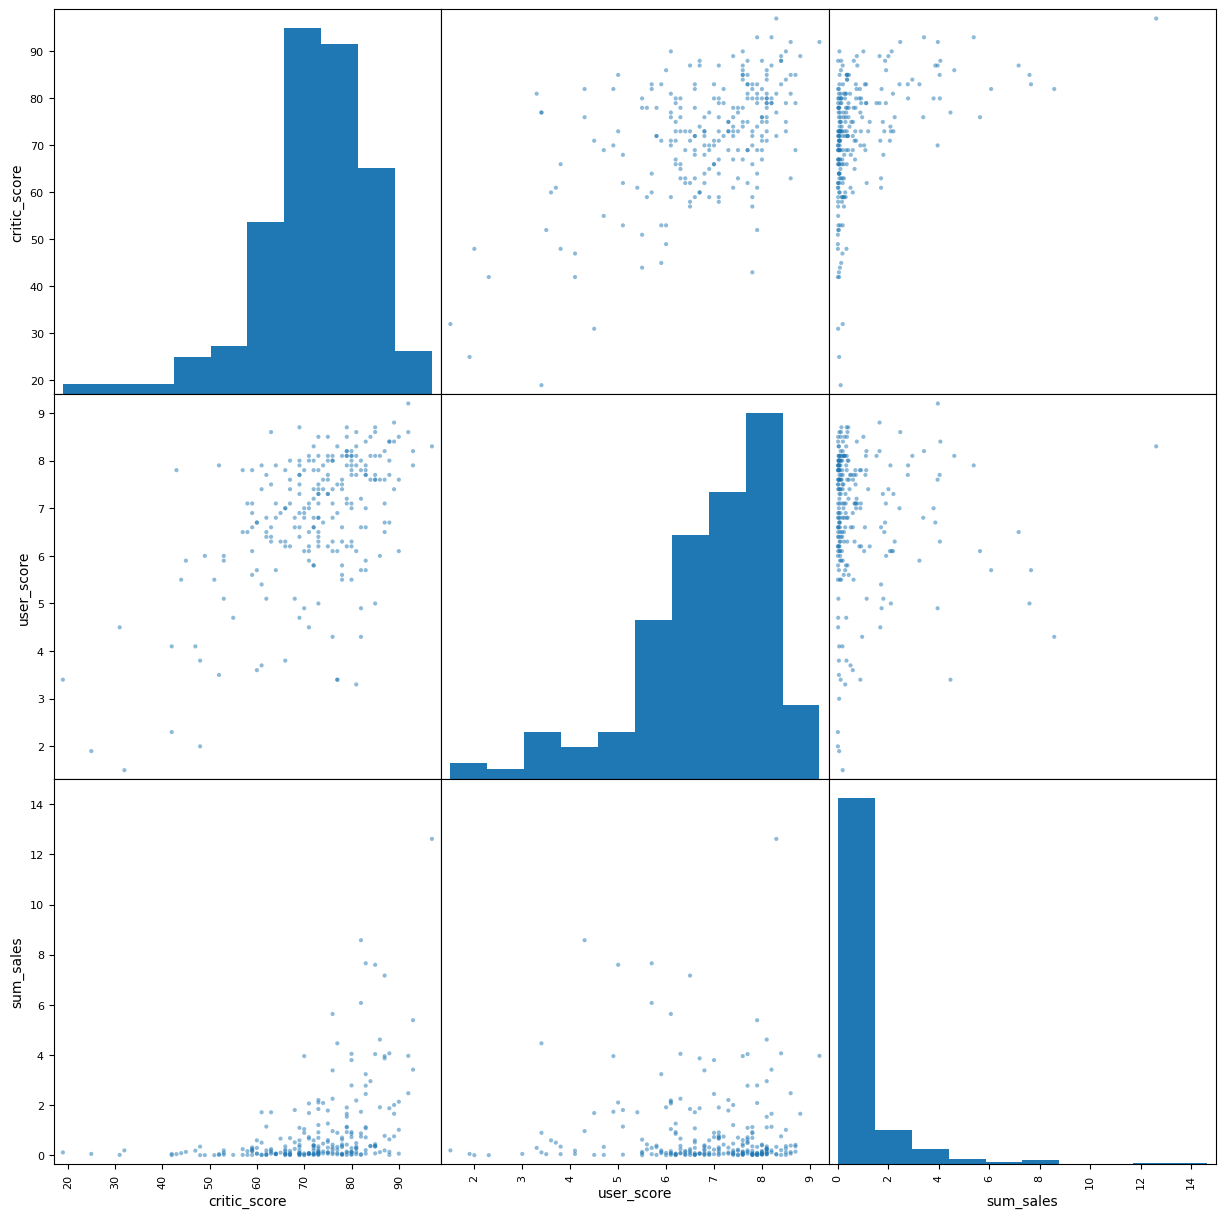

In [53]:
# диаграмма рассеяния для PS4
pd.plotting.scatter_matrix(ps4_filtered, figsize=(15, 15))
ps4_filtered.corr()

In [54]:
ps3_filtered = actual_period.query('platform == "PS3"')
ps3_filtered = ps4_filtered[['critic_score', 'user_score', 'sum_sales']]
ps3_filtered

,critic_score,user_score,sum_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66
...,...,...,...
16500,69.0,7.5,0.01
16503,NaN,NaN,0.01
16526,61.0,7.9,0.01
16530,51.0,5.5,0.01


,critic_score,user_score,sum_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
sum_sales,0.402661,-0.040132,1.000000


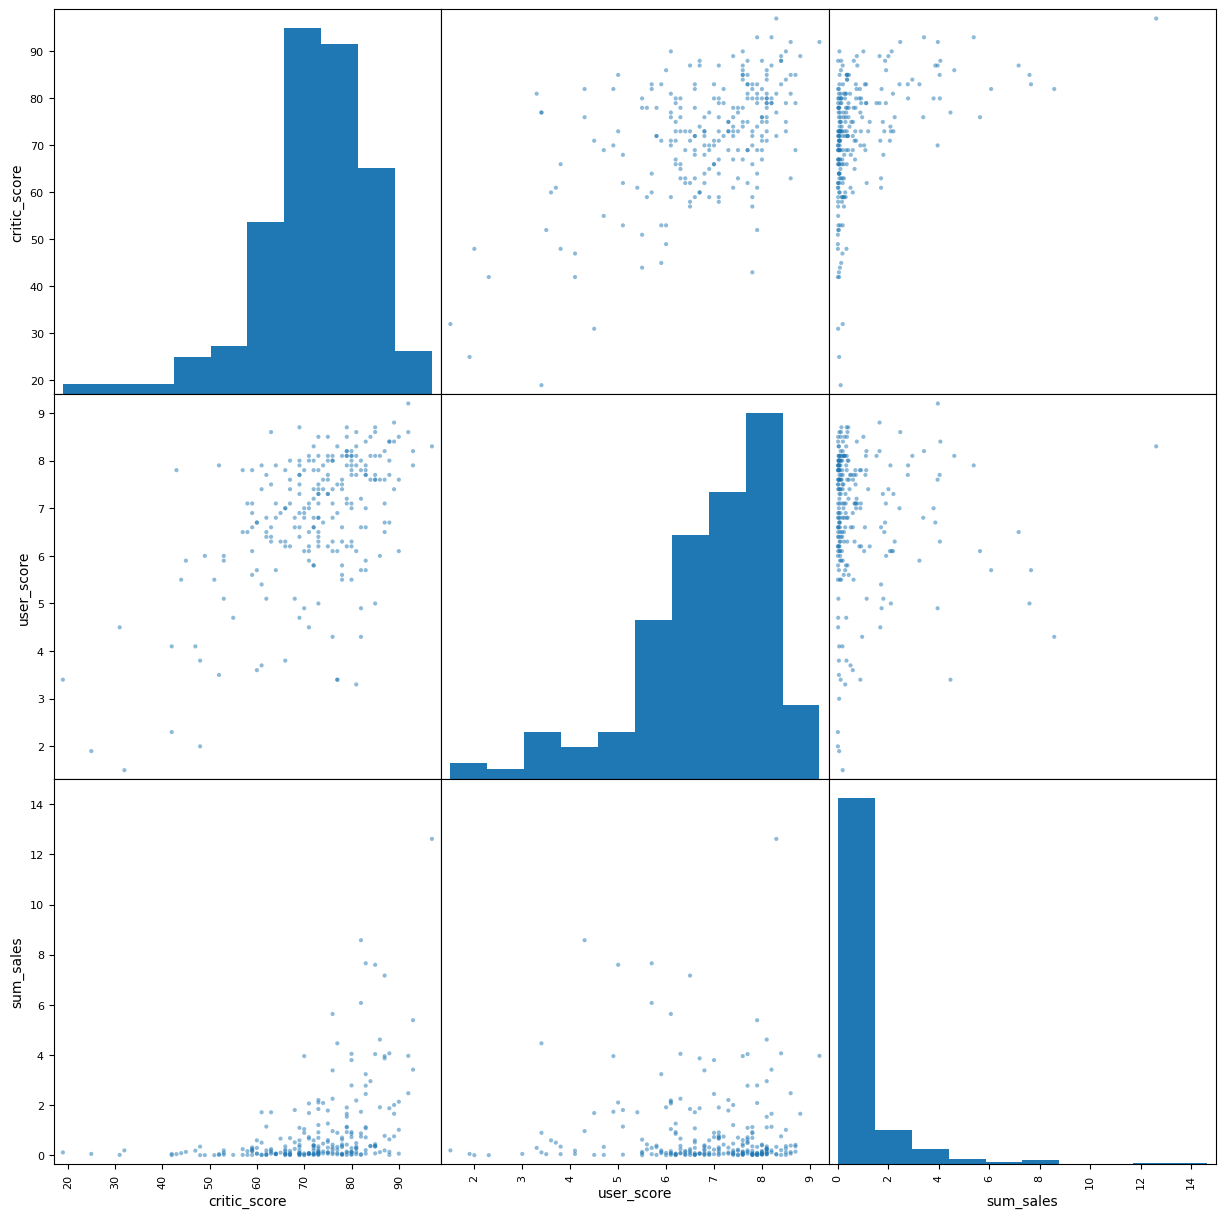

In [55]:
# диаграмма рассеяния для PS3
pd.plotting.scatter_matrix(ps3_filtered, figsize=(15, 15))
ps3_filtered.corr()

In [56]:
X360_filtered = actual_period.query('platform == "X360"')
X360_filtered = X360_filtered[['critic_score', 'user_score', 'sum_sales']]
X360_filtered

,critic_score,user_score,sum_sales
263,NaN,4.9,4.28
494,NaN,4.2,2.92
829,NaN,5.5,2.05
898,NaN,4.7,1.92
1049,NaN,NaN,1.70
...,...,...,...
15142,NaN,NaN,0.02
15376,NaN,7.5,0.02
15578,NaN,6.8,0.02
16294,NaN,NaN,0.01


,critic_score,user_score,sum_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,-0.138445
sum_sales,0.525723,-0.138445,1.000000


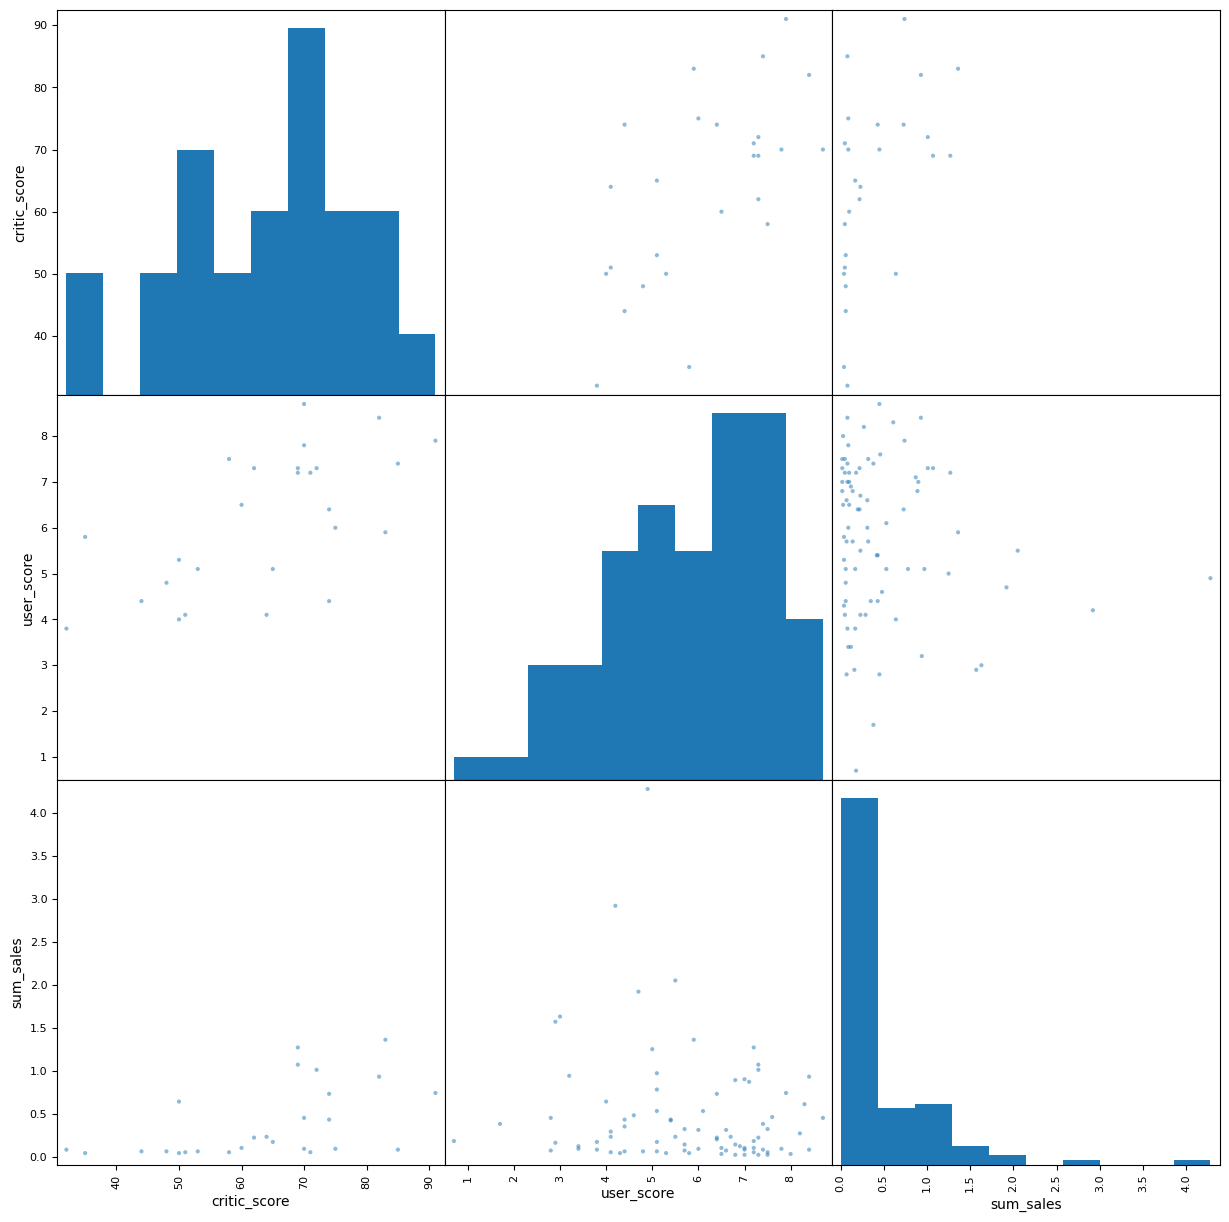

In [57]:
# диаграмма рассеяния для X360
pd.plotting.scatter_matrix(X360_filtered, figsize=(15, 15))
X360_filtered.corr()

In [58]:
_3ds_filtered = actual_period.query('platform == "3DS"')
_3ds_filtered = _3ds_filtered[['critic_score', 'user_score', 'sum_sales']]
_3ds_filtered

,critic_score,user_score,sum_sales
47,NaN,NaN,11.68
96,NaN,NaN,7.55
108,NaN,NaN,7.14
312,86.0,8.7,3.89
406,NaN,NaN,3.32
...,...,...,...
16599,NaN,NaN,0.01
16608,NaN,NaN,0.01
16610,NaN,NaN,0.01
16668,NaN,NaN,0.01


,critic_score,user_score,sum_sales
critic_score,1.000000,0.862485,0.314117
user_score,0.862485,1.000000,0.215193
sum_sales,0.314117,0.215193,1.000000


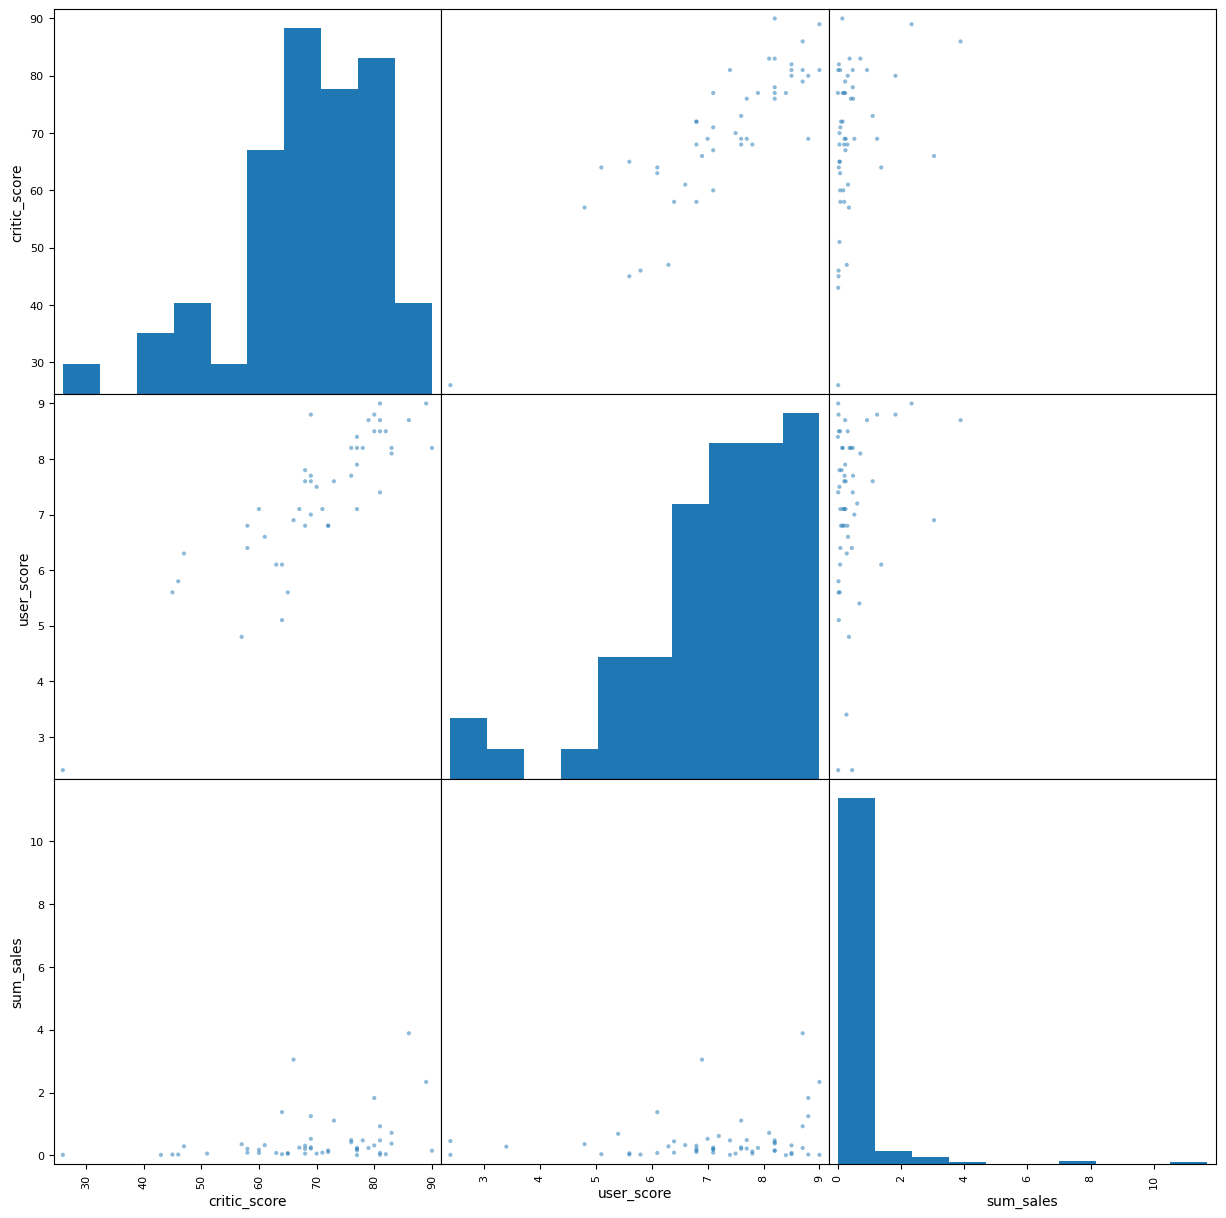

In [59]:
# диаграмма рассеяния для 3DS
pd.plotting.scatter_matrix(_3ds_filtered, figsize=(15, 15))
_3ds_filtered.corr()

In [60]:
xone_filtered = actual_period.query('platform == "XOne"')
xone_filtered = xone_filtered[['critic_score', 'user_score', 'sum_sales']]
xone_filtered

,critic_score,user_score,sum_sales
99,NaN,NaN,7.39
165,97.0,7.9,5.47
179,81.0,5.4,5.26
242,84.0,6.4,4.49
270,88.0,6.2,4.22
...,...,...,...
16630,63.0,8.2,0.01
16643,NaN,6.6,0.01
16645,NaN,NaN,0.01
16660,74.0,6.7,0.01


,critic_score,user_score,sum_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
sum_sales,0.428677,-0.070384,1.000000


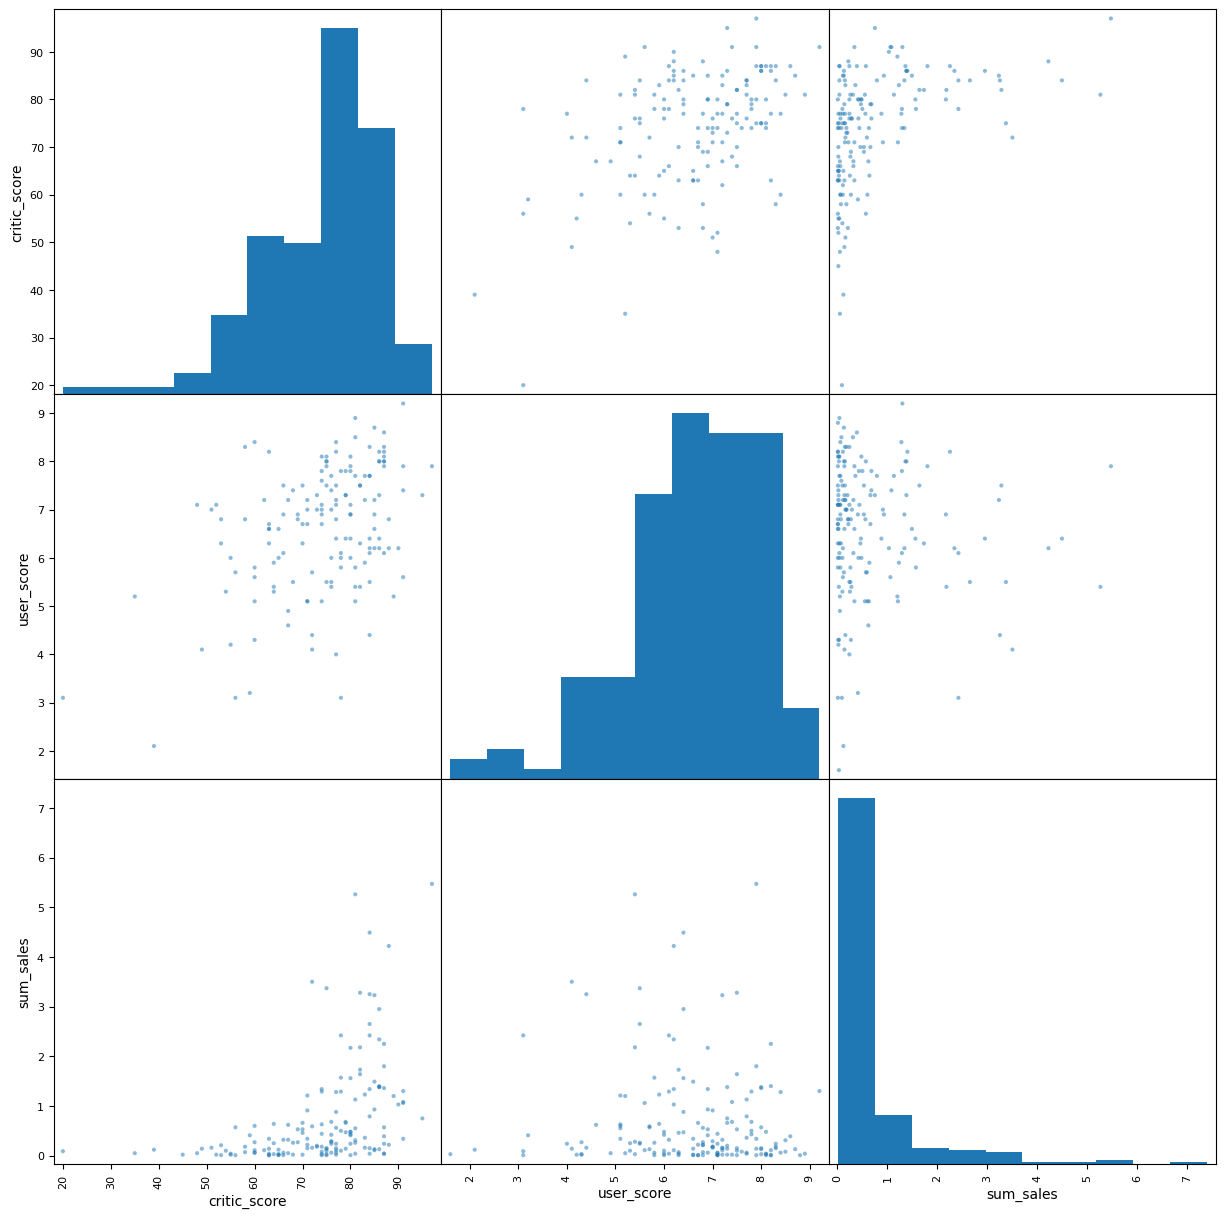

In [61]:
# диаграмма рассеяния для XOne
pd.plotting.scatter_matrix(xone_filtered, figsize=(15, 15))
xone_filtered.corr()

<font color='green'>**Вывод:**</font>

По построенным графикам мы видим, что все платформы имеют похожие связи, а то есть между оценкой критиков и суммарной выручкой выявлена линейная зависимость, также между оценкой пользователей и оценкой критиков зависимость присутствует.

**3.6 Посмотрим на общее распределение игр по жанрам**

In [62]:
# Общее распределение игр по жанрам
actual_period['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [63]:
genre_pivot = actual_period.pivot_table(index=['genre'], values = 'sum_sales', aggfunc = 'mean').reset_index().sort_values('sum_sales' , ascending = False)
genre_pivot

,genre,sum_sales
8,Shooter,1.335469
10,Sports,0.680000
4,Platform,0.476053
2,Fighting,0.470333
7,Role-Playing,0.459005
6,Racing,0.398841
3,Misc,0.332301
0,Action,0.322068
9,Simulation,0.298409
5,Puzzle,0.157857


In [64]:
# список топ-5 перспективных жанров
top_5_genre = ['Shooter', 'Platform', 'Sports', 'Role-Playing', 'Racing']

In [65]:
actual_period_genre = actual_period.query('genre in @top_5_genre')

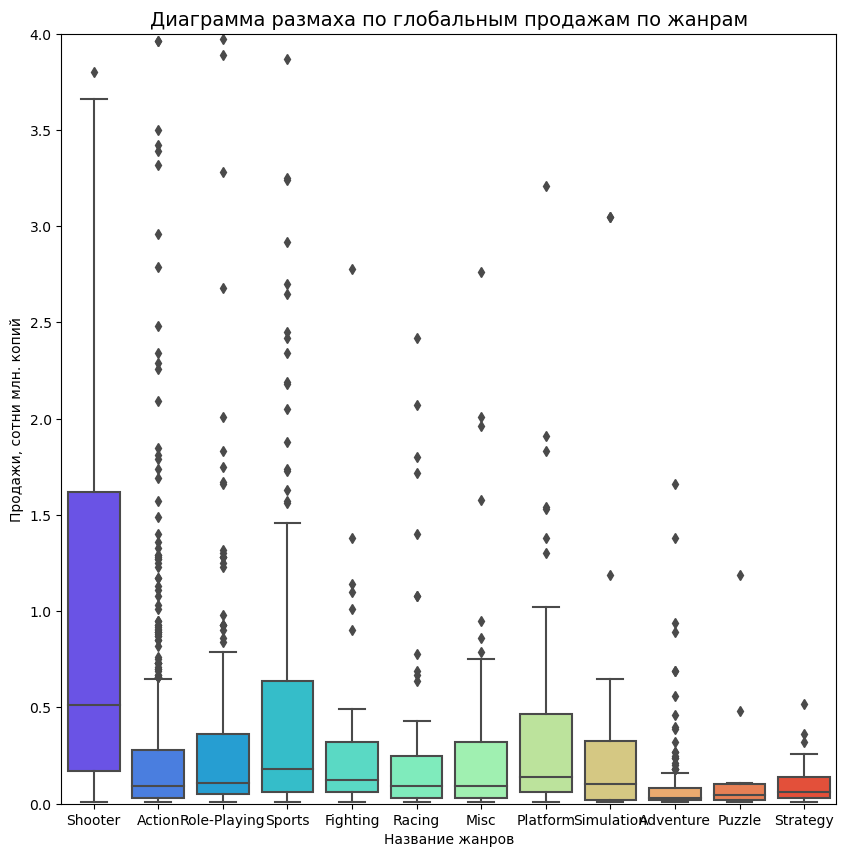

In [66]:
#построим ящик с усами для продаж игр за актуальный период
plt.figure(figsize=(10, 10))
plt.ylim(0, 4)
sns.boxplot(x="genre", y="sum_sales", data = actual_period , palette='rainbow' )
plt.title('Диаграмма размаха по глобальным продажам по жанрам', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название жанров');

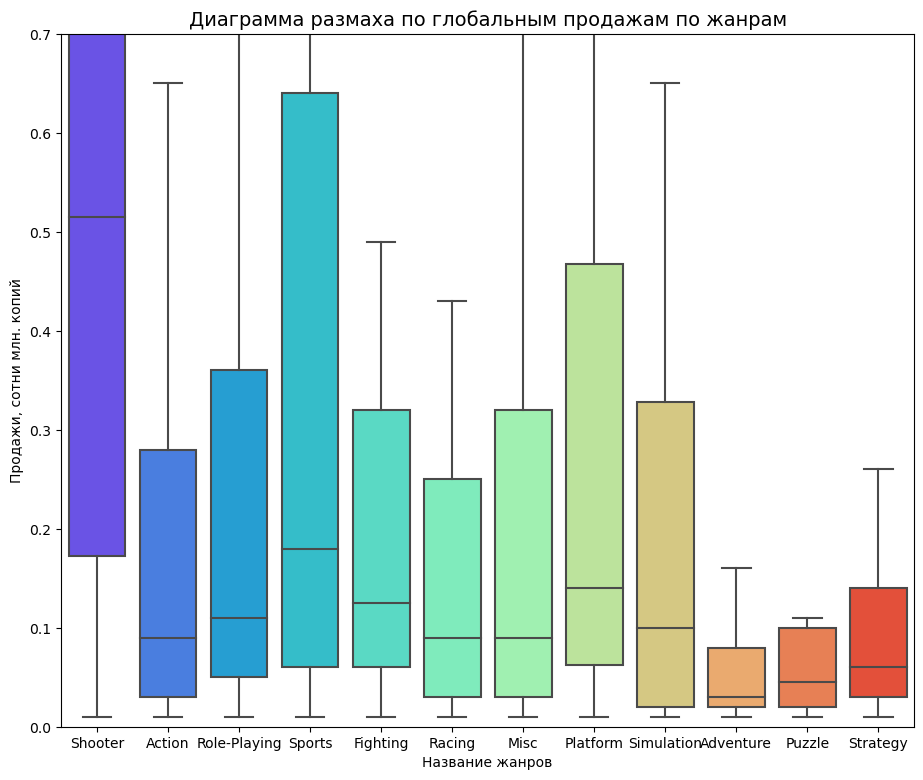

In [67]:
#построим ящик с усами для продаж игр за актуальный период
plt.figure(figsize=(11, 9))
plt.ylim(0, 0.7)
sns.boxplot(x="genre", y="sum_sales", data = actual_period , palette='rainbow',showfliers=False )
plt.title('Диаграмма размаха по глобальным продажам по жанрам', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название жанров');

<font color='green'>**Вывод:**</font>
    
Топ-5 жанрами по продажам являются: 'Shooter', 'Sports' 'Platform', 'Role-playing' и 'Racing'

График ящик с усами демонстрирует, что медианное значение продаж шутеров самое большое среди всех жанров.

Самые низкие продажи у игр в жанре 'Adventure' и 'Puzzle'.

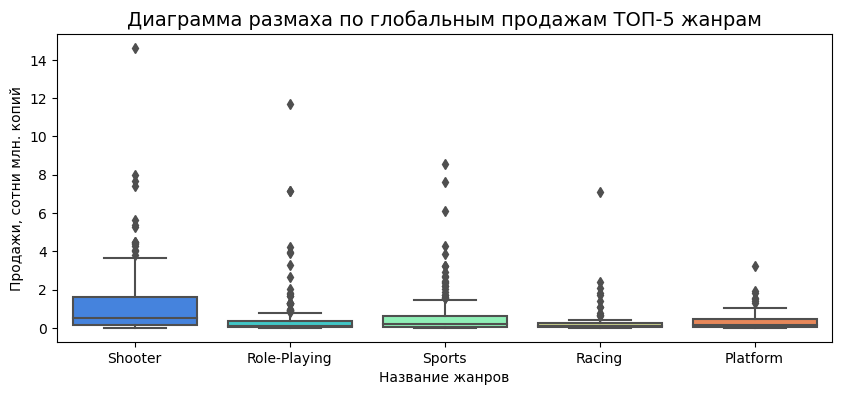

In [68]:
# check
plt.figure(figsize=(10, 4))
# plt.ylim(0, 4)
sns.boxplot(x="genre", y="sum_sales", data = actual_period_genre , palette='rainbow' )
plt.title('Диаграмма размаха по глобальным продажам ТОП-5 жанрам', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название жанров');

### Составление портрета пользователя каждого региона

**4.1 Самые популярные платформы (топ-5) для региона (NA, EU, JP)**

In [69]:
# популярные платформы в Северной Америке
na_pivot = pd.pivot_table(actual_period, index='platform', values='na_sales', aggfunc='sum') \
               .reset_index().sort_values('na_sales', ascending=False).head()
na_pivot

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [70]:
# добавим платформы которые не попали в Топ-5 в категорию 'Другие'
na_pivot.loc['other', 'na_sales'] = actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
               .sort_values('na_sales', ascending=False).iloc[5:].sum()[0]

In [71]:
na_pivot

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05
other,NaN,31.19


In [72]:
# популярные платформы в Европе
eu_pivot = actual_period.groupby(['platform']).agg({'eu_sales':'sum'}) \
              .reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_pivot

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [73]:
# добавим платформы которые не попали в Топ-5 в категорию 'Другие'
eu_pivot.loc['other', 'eu_sales'] = actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
               .sort_values('eu_sales', ascending=False).iloc[5:].sum()[0]

In [74]:
# популярные платформы в Японии
jp_pivot = pd.pivot_table(actual_period, index='platform', values='jp_sales', aggfunc='sum') \
                   .reset_index().sort_values('jp_sales', ascending=False).head()
jp_pivot

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


In [75]:
# добавим платформы которые не попали в Топ-5 в категорию 'Другие'
jp_pivot.loc['other', 'jp_sales'] = actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
               .sort_values('jp_sales', ascending=False).iloc[5:].sum()[0]

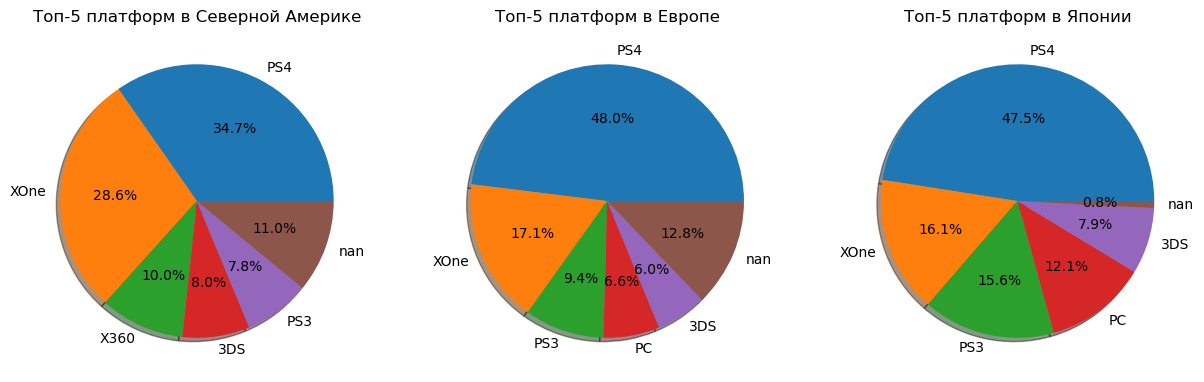

In [76]:
# построим круговые диаграммы
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.pie(data = na_pivot, x = 'na_sales', labels = na_pivot['platform'], autopct = '%1.1f%%', shadow=True)
plt.title('Топ-5 платформ в Северной Америке')
plt.subplot(1, 3, 2)
plt.pie(data = eu_pivot, x = 'eu_sales', labels = eu_pivot['platform'], autopct = '%1.1f%%', shadow=True)
plt.title('Топ-5 платформ в Европе')
plt.subplot(1, 3, 3)
plt.pie(data = jp_pivot, x = 'jp_sales', labels = eu_pivot['platform'], autopct = '%1.1f%%', shadow=True)
plt.title('Топ-5 платформ в Японии')
plt.show()

<font color='green'>**Вывод:**</font>

1. Топ-5 в Северной Америке: PS4, XOne, X360, 3DS и PS3.
2. Топ-5 в Европе: PS4, XOne, PS3, PC и 3DS.
3. Топ-5 в Японии: 3DS, PS4, PSV, PS3, WiiU.

**4.2 4.1 Самые популярные жанры (топ-5) для региона (NA, EU, JP)**

In [77]:
# популярные жанры в Северной Америке
na_genre = pd.pivot_table(actual_period, index='genre', values='na_sales', aggfunc='sum') \
                   .reset_index().sort_values('na_sales', ascending=False).head()
na_genre

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [78]:
# добавим жанры которые не попали в Топ-5 в категорию 'Другие'
na_genre.loc['other', 'na_sales'] = actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
               .sort_values('na_sales', ascending=False).iloc[5:].sum()[0]

In [79]:
# популярные жанры в Европе
eu_genre = pd.pivot_table(actual_period, index='genre', values='eu_sales', aggfunc='sum') \
                   .reset_index().sort_values('eu_sales', ascending=False).head()
eu_genre

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [80]:
# добавим жанры которые не попали в Топ-5 в категорию 'Другие'
eu_genre.loc['other', 'eu_sales'] = actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
               .sort_values('eu_sales', ascending=False).iloc[5:].sum()[0]

In [81]:
# популярные жанры в Японии
jp_genre = pd.pivot_table(actual_period, index='genre', values='jp_sales', aggfunc='sum') \
                   .reset_index().sort_values('jp_sales', ascending=False).head()
jp_genre

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


In [82]:
# добавим жанры которые не попали в Топ-5 в категорию 'Другие'
jp_genre.loc['other', 'jp_sales'] = actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
               .sort_values('jp_sales', ascending=False).iloc[5:].sum()[0]

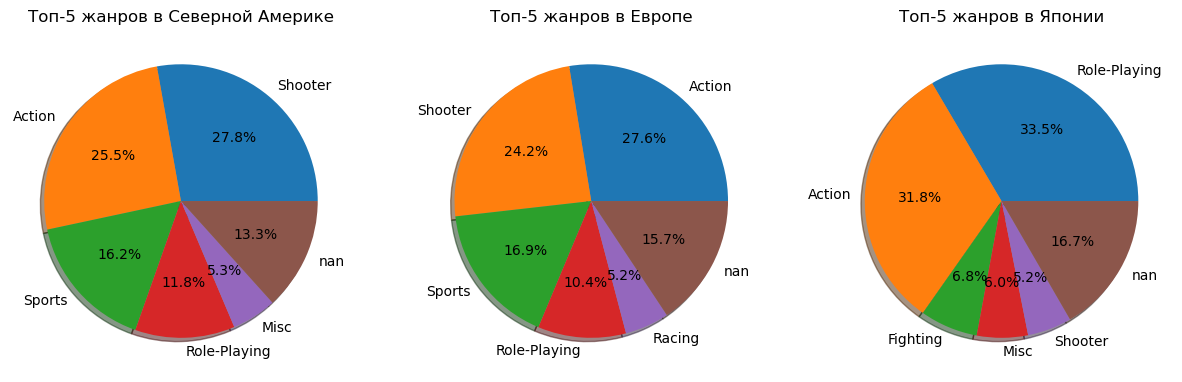

In [83]:
# построим круговые диаграммы
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.pie(data = na_genre, x = 'na_sales', labels = na_genre['genre'], autopct = '%1.1f%%', shadow=True)
plt.title('Топ-5 жанров в Северной Америке')
plt.subplot(1, 3, 2)
plt.pie(data = eu_genre, x = 'eu_sales', labels = eu_genre['genre'], autopct = '%1.1f%%', shadow=True)
plt.title('Топ-5 жанров в Европе')
plt.subplot(1, 3, 3)
plt.pie(data = jp_genre, x = 'jp_sales', labels = jp_genre['genre'], autopct = '%1.1f%%', shadow=True)
plt.title('Топ-5 жанров в Японии')
plt.show()

<font color='green'>**Вывод:**</font>

1. Топ-5 в Северной Америке: Shooter, Action, Sports, Role-Playing и Misc.
2. Топ-5 в Европе: Action, Shooter, Sports, Role-Playing и Racing.
3. Топ-5 в Японии: Role-Playing, Action, Fighting, Misc, Shooter.


**4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

**Расшифровки аббревиатур значений рейтинга ESRB:**

1. AO (Adults only 18+) — только для взрослых
2. E - everyone - для всех
3. M (Mature 17+) — от 17 лет
4. T (Teen) — для подростков 13-19 лет
5. K-A (Kids to Adults)— для детей и взрослых
6. E10+ (Everyone 10+) — для всех старше 10 лет
7. EC (Early Childhood) — для детей младшего возраста
8. RP (Rating pending) — рейтинг ожидается

In [86]:
# суммарное кол-во рейтинга в регионах
rating_sum = (actual_period
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          ).reset_index()
rating_sum

,rating,eu_sales,jp_sales,na_sales
0,E,58.06,8.94,50.74
1,E10+,26.16,4.46,33.23
2,M,93.44,8.01,96.42
3,T,34.07,14.78,38.95
4,zero_rating,58.95,56.90,64.72


In [87]:
# влияние рейтинга в Северной Америке
rating_na = pd.pivot_table(actual_period, index='rating', values='na_sales', aggfunc='sum') \
               .reset_index().sort_values('na_sales', ascending=False)
rating_na

,rating,na_sales
2,M,96.42
4,zero_rating,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


In [88]:
# влияние рейтинга в Европе
rating_eu = pd.pivot_table(actual_period, index='rating', values='eu_sales', aggfunc='sum') \
             .reset_index().sort_values('eu_sales', ascending=False)
rating_eu

,rating,eu_sales
2,M,93.44
4,zero_rating,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


In [89]:
# влияние рейтинга в Японии
rating_jp = pd.pivot_table(actual_period, index='rating', values='jp_sales', aggfunc='sum') \
             .reset_index().sort_values('jp_sales', ascending=False)
rating_jp

,rating,jp_sales
4,zero_rating,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


<font color='green'>**Вывод:**</font>

1. В Северной Америке и Европе очень схожие результаты по рейтингу. Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех.
2. В Японии первое место занимают игры без рейтинга, возможно это связанно со сложностью оценки игры, на втором месте преобладают игры с оценкой E - everyone - для всех, тройку лучших замыкают игры с рейтингом T (Teen) — для подростков 13-19 лет.

Можно сделать вывод, что оценка рейтинга ESRB влияете на продажи.

### Проверка гипотез

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Cформулируем нулевую и альтернативную гипотезу (H_0 и H_a):

H_0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC.

H_a: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC.

Примем alpha = 0.05

Исключим пропущенные значения в столбце user_score, так как для расчета pvalue не должно быть пропусков в пользовательских рейтингах.

In [90]:
xone_data = actual_period.query('platform == "XOne"')['user_score'].dropna()
pc_data = actual_period.query('platform == "PC"')['user_score'].dropna()

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(xone_data, pc_data, equal_var = False)

# alpha = критический уровень статистической значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# вывод строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<font color='green'>**Вывод:**</font>

Применив тест Стюдента не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC, а это значит, что средние пользовательские рейтинги с большой вероятность равны. Если бы у нас p-value оказался меньше критического уровня статистической значимости то мы отвергнули бы нулевую гипотезу.

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные**

Сформулируем нулевую и альтернативную гипотезу (H_0 и H_1):

H_0: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports.

H_1: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports.

Примем alpha = 0.05

In [92]:
rating_action = actual_period.query('genre == "Action"')['user_score'].dropna()
rating_sports = actual_period.query('genre == "Sports"')['user_score'].dropna()

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(rating_action, rating_sports, equal_var = False)

# alpha = критический уровень статистической значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# вывод строки с ответом
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<font color='green'>**Вывод:**</font>

По результатом теста мы отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, а значит средние пользовательские рейтинги с большой вероятность отличаются.

### Общий вывод

**Предобработка данных**

- Заменили названия столбцов
- Преобразовали в нужные типы данных 
- Обработали пропуски
- Посчитали суммарные продажи во всех регионах в новый столбец

**Исследовательский анализ данных**

- Начиная с 1994 года произошел подъем игровой индустрии вплоть до 2009 года включительно, с каждым годом игр выпускалось все больше и больше. В период с 2012 - 2016 произошел спад, скорее всего в эти годы игровую индустрию задел финансовый кризис в мире.
- Наибольшие суммарные продажи имеют платформы: PS2, X360, PS3, Wii, DS, PS
- В среднем продолжительность жизни платформ 11 лет. Старые платформы исчезают на протяжении 2-3х лет. Так как технологии развиваются быстро и игры будут выпускаться чаще, актуальный период будет 3 года для построения прогноза на 2017 год.
- Улучшить показатели продаж имеют шанс платформы PS4, XOne, WiiU, PC. Наилучшие перспективы у платформ PS4 и XOne.
- В актуальном периоде все платформы имеют похожие связи, а то есть между оценкой критиков и суммарной выручкой выявлена линейная зависимость, также зависимость присутствует между оценкой пользователей и оценкой критиков.
- Топ-5 жанрами по продажам являются: 'Shooter', 'Sports' 'Platform', 'Role-playing' и 'Racing'. График ящик с усами демонстрирует, что медианное значение продаж шутеров самое большое среди всех жанров.

**Популярные платформы в регионах**

- Топ-5 в Северной Америке: PS4, XOne, X360, 3DS и PS3.
- Топ-5 в Европе: PS4, XOne, PS3, PC и 3DS.
- Топ-5 в Японии: 3DS, PS3, PSV, PS4, WiiU.

**Популярные жанры в регионах**

- Топ-5 в Северной Америке: Shooter, Action, Sports, Role-Playing и Misc.
- Топ-5 в Европе: Action, Shooter, Sports, Role-Playing и Racing.
- Топ-5 в Японии: Role-Playing, Action, Fighting, Misc, Shooter.

**Влияние рейтинга ESRB**

Оценка рейтинга ESRB влияете на продажи.
В Северной Америке и Европе очень схожие результаты по рейтингу. Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех.
В Японии первое место занимают игры без рейтинга, возможно это связанно со сложностью оценки игры, на втором месте преобладают игры с оценкой E - everyone - для всех, тройку лучших замыкают игры с рейтингом T (Teen) — для подростков 13-19 лет.

**Проверка гипотез**

- Cредние пользовательские рейтинги платформ Xbox One и PC не различаются
- Cредние пользовательские рейтинги жанров Action и Sports различаются

### Рекомендации

- Ставку лучше делать на игры для консолей.
- При создании игр стоит делать упор на современные технологии.
- Чем шире возрастной рейтинг, больше аудитории и больше продаж.
- Стоит учитывать региональные предпочтения по жанрам и платформам, так как в Северной Америке и Европе они схожи, а вот в Японии они уже другие.